# Setup

The following lines of code need to be run once before anything else.

They load the necessary libraries of code, and the proper codes.

In [1]:
import sys
from os import path
sys.path.append("/home/alec/projects/nytimes-obituaries/lib")

import occ, nlp, wiki

nlp.nlp.restricted = True

Loading term-code associations into variable 'codes' from /home/alec/projects/nytimes-obituaries/lib/../w2c_source/compiledCodes.csv...


In [4]:
coder = occ.Coder()
coder.loadPreviouslyCoded("coding1000")

loaded 998 documents


# Histogram of ages at death

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/home/alec/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/font_manager.py:279: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f024fcf9828>]], dtype=object)

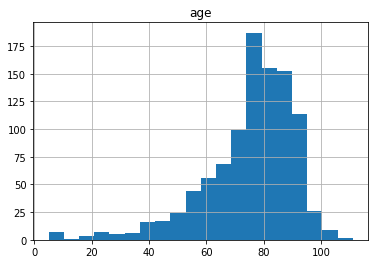

In [9]:
all_ages = [x.age for x in coder.obituaries]
agedf = pd.DataFrame({"age":all_ages})
agedf.hist(bins=20)

# What are those really low ages?

They seem to be errors, and need some investigation

In [12]:
low_ages = [x for x in coder.obituaries if x.age < 20]

In [13]:
for obit in low_ages:
    print(obit.info["title"])

Ben Heineman, Multifaceted Businessman, Dies at 98
John Fairfax, Who Rowed Across Oceans, Dies at 74
Harrison S. Kravis, Student, 19
Sir Rex Hunt, Symbol of British Defiance In the Windswept Falklands, Dies at 86
Georges Hereil, 71, Industrialist; Called the Father of the Caravelle
Harry K. Weiss, Realty Executive, 83
Charles Keyes, 76, Parson in Appalachian Hills
Walt Arfons, a Tinkerer Who Gave Racecars Wings, Dies at 96
Nora Kaye Honored In Memorial Tribute By Artist Colleagues
Recalling the Civilized Voice Of a Critic, Vincent Canby


In [21]:
investigate = low_ages[0]
print(investigate.age, investigate.info["fullBody"])

16 
 Ben W. Heineman, a lawyer and corporate leader who took over railroads, created
 one of the nation's first conglomerates and became a close confidant and adviser
 to President Lyndon B. Johnson, died on Sunday in Waukesha, Wis. He was 98.The
 cause was a stroke, his son, Ben Jr., said.
 Joseph A. Califano Jr., who was Johnson's chief domestic aide, said in an
 interview Thursday that the president had asked him countless times to call Mr.
 Heineman for advice. He said the president valued Mr. Heineman's business
 acumen, honesty and grasp of the laws and social programs that the Johnson
 administration hoped to carry out in areas like civil rights, health, education,
 pollution control and consumer protection.
 ''More than anyone, he understood what we were trying to do,'' Mr. Califano
 said. ''He was quite a selfless person. He had no personal agenda. He told it
 like it was, which is very hard, and the most important thing you can do for a
 president or one of his top aides, lik